In [160]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

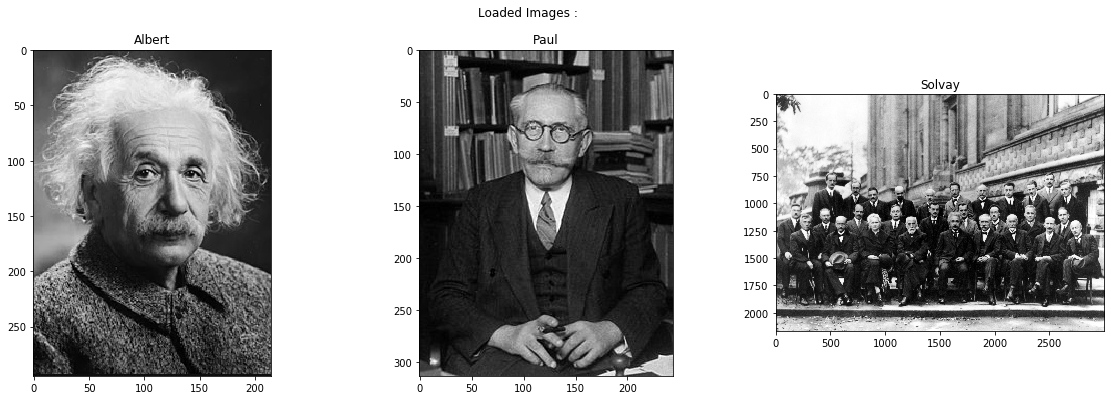

In [161]:
albert=cv2.imread('DATA/PT23.jpg')
paul=cv2.imread('DATA/PT22.jpg')
solvay=cv2.imread('DATA/PT21.jpg')
#plt.imshow(albert,cmap='gray')

plt.figure(figsize=(20,6))
plt.subplot(131)
plt.imshow(albert)
plt.title('Albert')

plt.subplot(132)
plt.imshow(paul)
plt.title('Paul')

plt.subplot(133)
plt.imshow(solvay)
plt.title('Solvay')

plt.suptitle('Loaded Images :')
plt.show()
print('\n')

In [162]:
face_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml')

In [172]:
def detect_face(img):
    face_img=img.copy()
    face_rects=face_cascade.detectMultiScale(face_img)
    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,255),10)
    return face_img

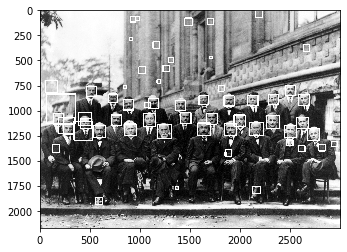

In [164]:
result = detect_face(solvay)
plt.imshow(result,cmap='gray')

In [165]:
def adj_detect_face(img):
    face_img=img.copy()
    face_rects=face_cascade.detectMultiScale(face_img,scaleFactor=1.31,minNeighbors=5)
    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    return face_img

In [166]:
result=adj_detect_face(solvay)

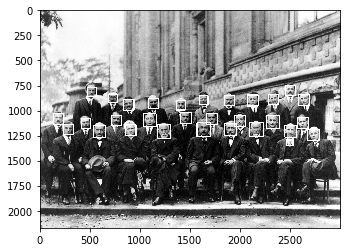

In [167]:
plt.imshow(result,cmap='gray')

In [168]:
face_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_eye.xml')

In [169]:
def detect_eyes(img):
    eye_img=img.copy()
    eyes_rects=face_cascade.detectMultiScale(eye_img,scaleFactor=1.2,minNeighbors=5)
    for(x,y,w,h) in eyes_rects:
        cv2.rectangle(eye_img,(x,y),(x+w,y+h),(255,0,255),8)
    return eye_img

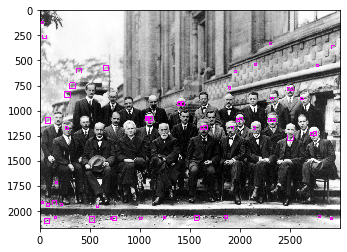

In [170]:
result = detect_eyes(solvay)
plt.imshow(result,cmap='gray')

In [174]:
cap=cv2.VideoCapture(0)
while True:
    ret,frame = cap.read(0)
    frame=detect_eyes(frame)
    cv2.imshow('Video Face Detect',frame)
    k=cv2.waitKey(1)
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()
    